In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import multivariant_analysis, load_csv


FILENAME = "drug_sex.csv"
filepath = f"../data/{FILENAME}"

In [95]:
drug_sex_df = load_csv(filepath)

In [19]:
drug_sex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   sex                                        164 non-null    object 
 1   time                                       164 non-null    int64  
 2   start_time                                 164 non-null    object 
 3   end_time                                   164 non-null    object 
 4   setting                                    164 non-null    object 
 5   all drugs                                  164 non-null    float64
 6   all opioids                                164 non-null    float64
 7   stimulants                                 164 non-null    float64
 8   cannabis                                   164 non-null    float64
 9   benzodiazepine                             164 non-null    float64
 10  all drugs and co-occurring

In [20]:
drug_sex_df.describe()

time   all drugs  all opioids  stimulants    cannabis  \
count  164.000000  164.000000   164.000000  164.000000  164.000000   
mean    21.000000   28.560620     2.496290    1.729003    1.840753   
std     11.868399    4.590807     1.054101    0.870717    0.740870   
min      1.000000   20.509256     0.778052    0.508047    0.663510   
25%     11.000000   24.667525     1.597198    1.068897    1.283868   
50%     21.000000   28.579324     2.526094    1.366040    1.665085   
75%     31.000000   30.903492     3.412645    2.644059    2.248633   
max     41.000000   41.255211     4.568825    3.550870    3.995721   

       benzodiazepine  all drugs and co-occurring disorders  \
count      164.000000                            164.000000   
mean         0.449924                             11.961079   
std          0.229804                              3.087166   
min          0.075926                              6.495932   
25%          0.235242                              8.936832   
50%          0.472584                             12.792658   
75%          0.626774                             14.797139   
max          1.006690                             18.029557   

       all opioids and co-occurring disorders  \
count                              164.000000   
mean                                22.656471   
std                                  4.750484   
min                                 13.015184   
25%                                 18.221306   
50%                                 23.699127   
75%                                 26.428643   
max                                 31.382979   

       stimulants and co-occurring disorders  \
count                             164.000000   
mean                               31.405624   
std                                 5.501080   
min                                19.409660   
25%                                26.835469   
50%                                31.531449   
75%                                34.794822   
max                                46.610169   

       cannabis and co-occurring disorders  ...  all drugs and covid-19  \
count                           164.000000  ...              164.000000   
mean                             25.623433  ...                4.662469   
std                               9.296444  ...                3.471809   
min                              11.599697  ...                0.000000   
25%                              16.452202  ...                2.428788   
50%                              25.370675  ...                4.064348   
75%                              33.785592  ...                6.014575   
max                              43.835616  ...               19.899710   

       all opioids and covid-19  stimulants and covid-19  \
count                164.000000               164.000000   
mean                   3.222898                 2.856757   
std                    3.004992                 3.002736   
min                    0.000000                 0.000000   
25%                    1.409020                 1.292444   
50%                    2.492788                 2.062075   
75%                    4.235932                 3.650235   
max                   20.634921                21.311475   

       cannabis and covid-19  benzodiazepine and covid-19  \
count             164.000000                   164.000000   
mean                3.016489                     2.742569   
std                 2.795597                     3.344524   
min                 0.000000                     0.000000   
25%                 1.415680                     0.000000   
50%                 2.562719                     1.778094   
75%                 3.762642                     3.721174   
max                22.709163                    17.647059   

       all opioids overdose  stimulants overdose  cannabis overdose  \
count            164.000000           164.000000         164.000000   
mean              30.011819   

In [30]:
male_drug_sex_df = drug_sex_df[drug_sex_df.sex == 'male']
male_drug_sex_df.describe()

all drugs  all opioids  stimulants   cannabis  benzodiazepine  \
count  82.000000    82.000000   82.000000  82.000000       82.000000   
mean   31.138435     3.109213    2.446041   2.280203        0.565683   
std     3.849883     0.908815    0.636829   0.752956        0.231852   
min    26.350613     1.559414    1.272496   1.001893        0.132941   
25%    28.702352     2.350430    2.027663   1.834192        0.447786   
50%    29.754420     3.418631    2.646010   2.246091        0.627946   
75%    32.030307     3.831381    2.830171   2.510470        0.734497   
max    41.255211     4.568825    3.550870   3.995721        1.006690   

       all drugs and co-occurring disorders  \
count                             82.000000   
mean                              11.307724   
std                                2.938346   
min                                6.495932   
25%                                8.302350   
50%                               12.172288   
75%                               13.958066   
max                               15.248227   

       all opioids and co-occurring disorders  \
count                               82.000000   
mean                                21.710833   
std                                  5.138127   
min                                 13.015184   
25%                                 16.600650   
50%                                 23.488662   
75%                                 25.237243   
max                                 31.382979   

       stimulants and co-occurring disorders  \
count                              82.000000   
mean                               29.063538   
std                                 4.356834   
min                                19.409660   
25%                                25.401284   
50%                                29.617630   
75%                                32.159991   
max                                37.639198   

       cannabis and co-occurring disorders  \
count                            82.000000   
mean                             24.669266   
std                               8.906976   
min                              11.599697   
25%                              15.881781   
50%                              25.649750   
75%                              32.858378   
max                              39.344262   

       benzodiazepine and co-occurring disorders  all drugs and covid-19  \
count                                  82.000000               82.000000   
mean                                   36.045559                4.591248   
std                                    13.269629                3.482386   
min                                     9.090909                0.029241   
25%                                    25.195958                2.331862   
50%                                    35.542929                3.938434   
75%                                    48.406298                5.853379   
max                                    56.862745               19.648952   

       all opioids and covid-19  stimulants and covid-19  \
count                 82.000000                82.000000   
mean                   3.144740                 2.987084   
std                    2.955669                 3.039515   
min                    0.000000                 0.000000   
25%                    1.375955                 1.159470   
50%                    2.335443                 2.392399   
75%                    3.923561                 3.975205   
max                   18.085106                20.537897   

       cannabis and covid-19  benzodiazepine and covid-19  \
count              82.000000                    82.000000   
mean                2.951236                     2.668032   
std                 2.558987                     3.199397   
min                 0.000000                     0.000000   
25%                 1.470863                     0.404129   
50%                 2.495330                     1.8

In [31]:
female_drug_sex_df = drug_sex_df[drug_sex_df.sex == 'female']
female_drug_sex_df.describe()

all drugs  all opioids  stimulants   cannabis  benzodiazepine  \
count  82.000000    82.000000   82.000000  82.000000       82.000000   
mean   25.982806     1.883366    1.011965   1.401303        0.334165   
std     3.759691     0.805856    0.281287   0.382894        0.159329   
min    20.509256     0.778052    0.508047   0.663510        0.075926   
25%    22.708571     1.143864    0.790353   1.181676        0.205070   
50%    24.602181     2.046303    1.067598   1.444890        0.362538   
75%    28.491006     2.570782    1.216267   1.657441        0.475923   
max    34.485531     3.266110    1.545552   2.336932        0.611969   

       all drugs and co-occurring disorders  \
count                             82.000000   
mean                              12.614435   
std                                3.111379   
min                                6.683838   
25%                                9.811308   
50%                               13.780150   
75%                               15.422711   
max                               18.029557   

       all opioids and co-occurring disorders  \
count                               82.000000   
mean                                23.602108   
std                                  4.147519   
min                                 14.252874   
25%                                 20.713259   
50%                                 24.064808   
75%                                 26.914545   
max                                 30.818966   

       stimulants and co-occurring disorders  \
count                              82.000000   
mean                               33.747711   
std                                 5.550603   
min                                23.129252   
25%                                29.680556   
50%                                33.970374   
75%                                38.081510   
max                                46.610169   

       cannabis and co-occurring disorders  \
count                            82.000000   
mean                             26.577600   
std                               9.630012   
min                              12.748644   
25%                              17.338885   
50%                              24.975949   
75%                              35.207865   
max                              43.835616   

       benzodiazepine and co-occurring disorders  all drugs and covid-19  \
count                                  82.000000               82.000000   
mean                                   38.967674                4.733690   
std                                    10.232415                3.481154   
min                                    19.047619                0.000000   
25%                                    30.000000                2.499841   
50%                                    40.740741                4.462992   
75%                                    45.454545                6.186296   
max                                    58.536585               19.899710   

       all opioids and covid-19  stimulants and covid-19  \
count                 82.000000                82.000000   
mean                   3.301056                 2.726431   
std                    3.069706                 2.978441   
min                    0.000000                 0.000000   
25%                    1.456481                 1.357858   
50%                    2.584534                 2.011029   
75%                    4.309906                 3.087102   
max                   20.634921                21.311475   

       cannabis and covid-19  benzodiazepine and covid-19  \
count              82.000000                    82.000000   
mean                3.081742                     2.817106   
std                 3.028229                     3.501769   
min                 0.000000                     0.000000   
25%                 1.355787                     0.000000   
50%                 2.656167                     1.6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


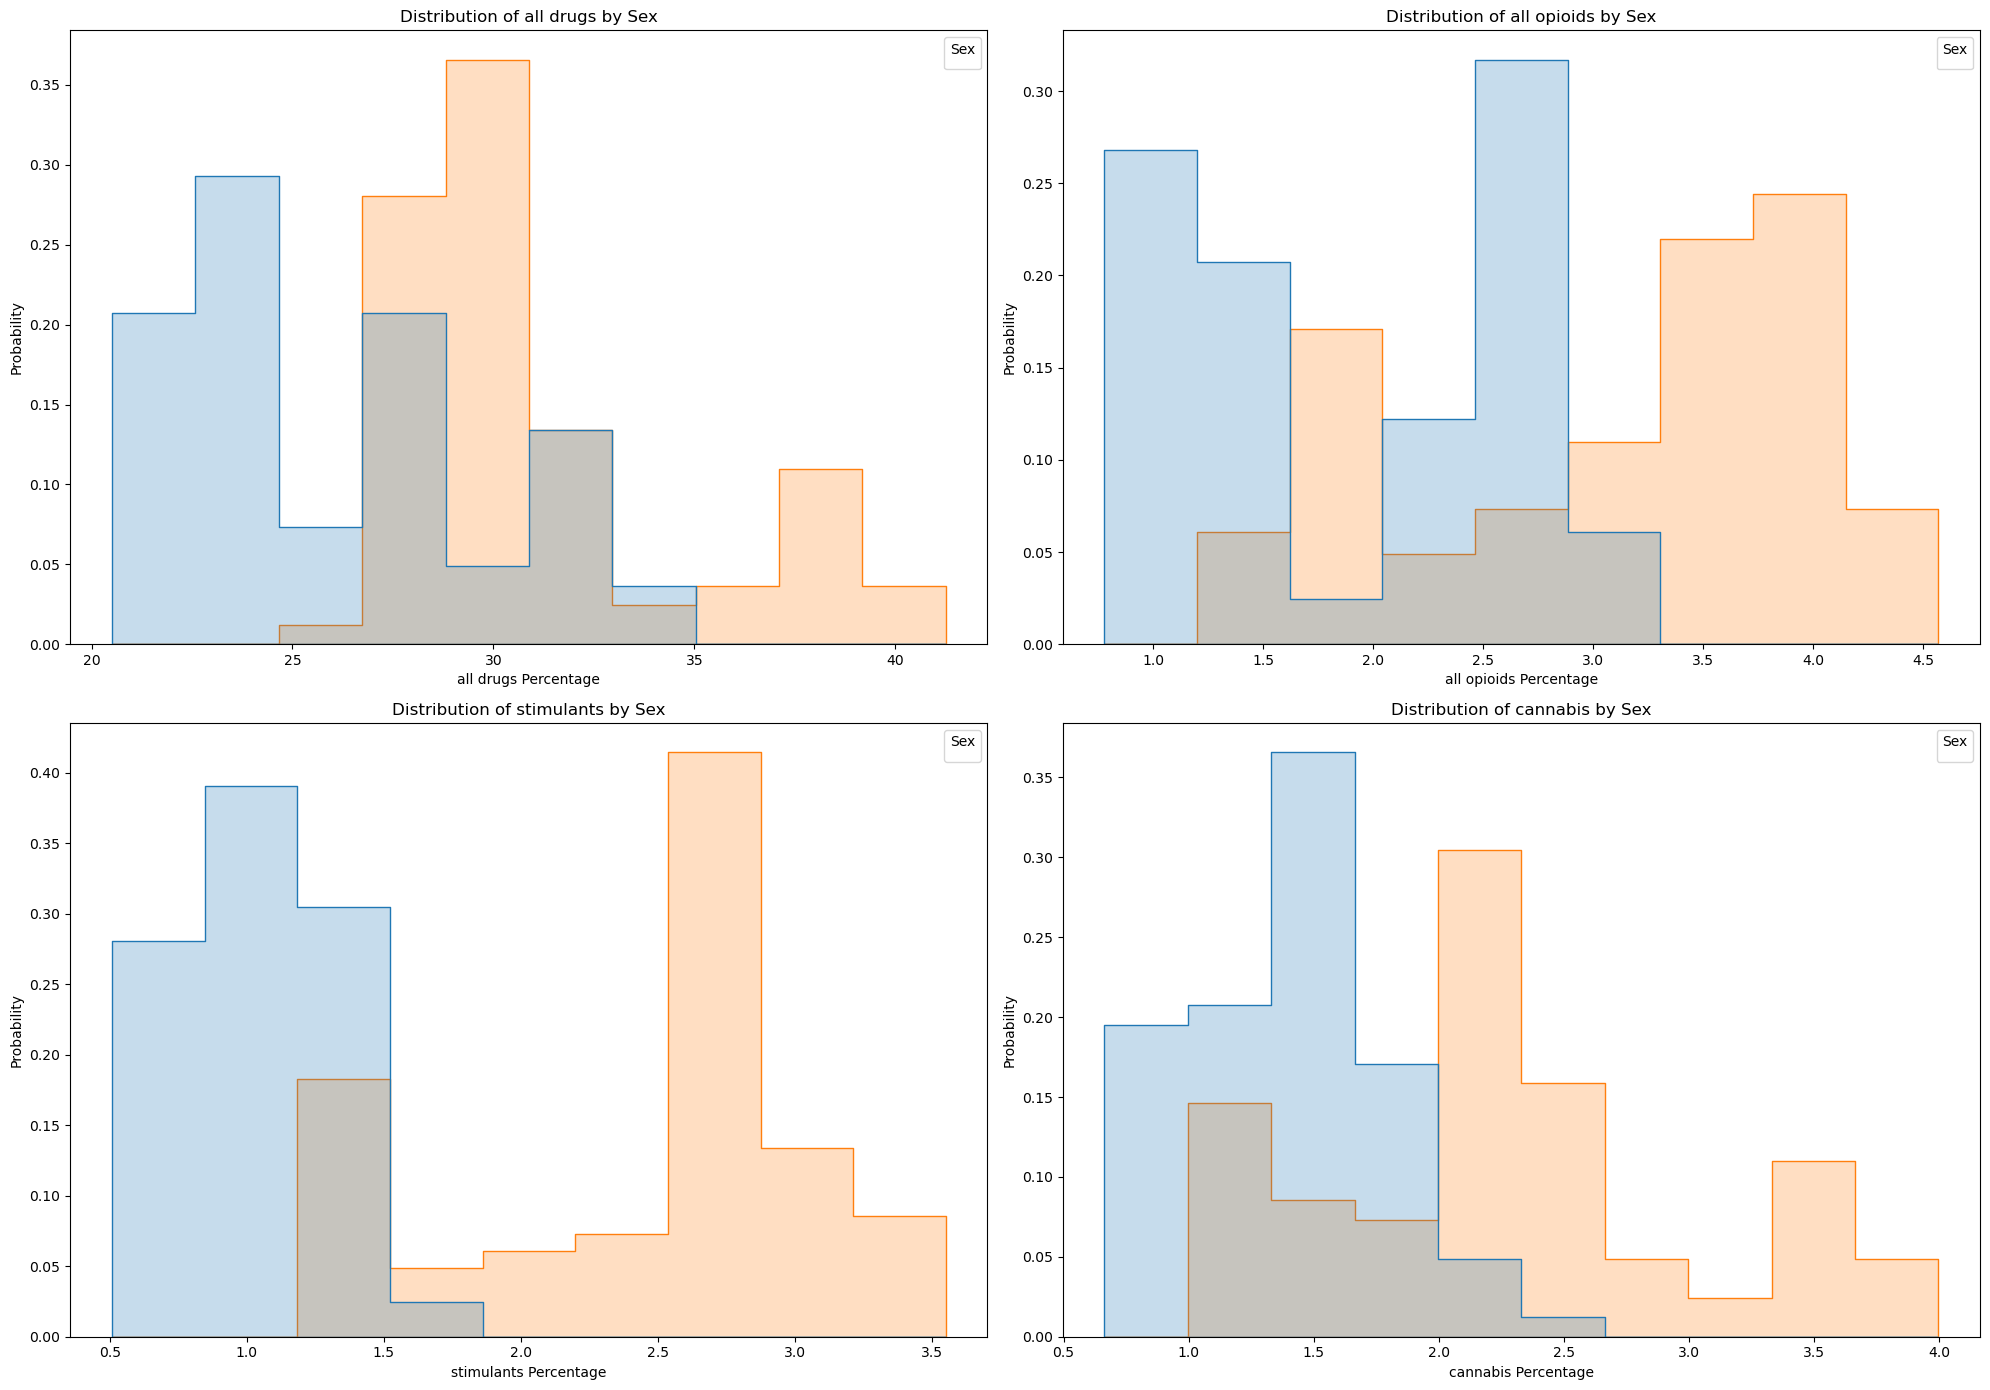

In [22]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 14))

# Plot distributions for key variables
variables = ['all drugs', 'all opioids', 'stimulants', 'cannabis']

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(drug_sex_df, x=var, hue="sex", element="step", stat="probability", common_norm=False)
    plt.title(f'Distribution of {var} by Sex')
    plt.xlabel(f'{var} Percentage')
    plt.ylabel('Probability')
    plt.legend(title='Sex')

plt.tight_layout()
plt.show()

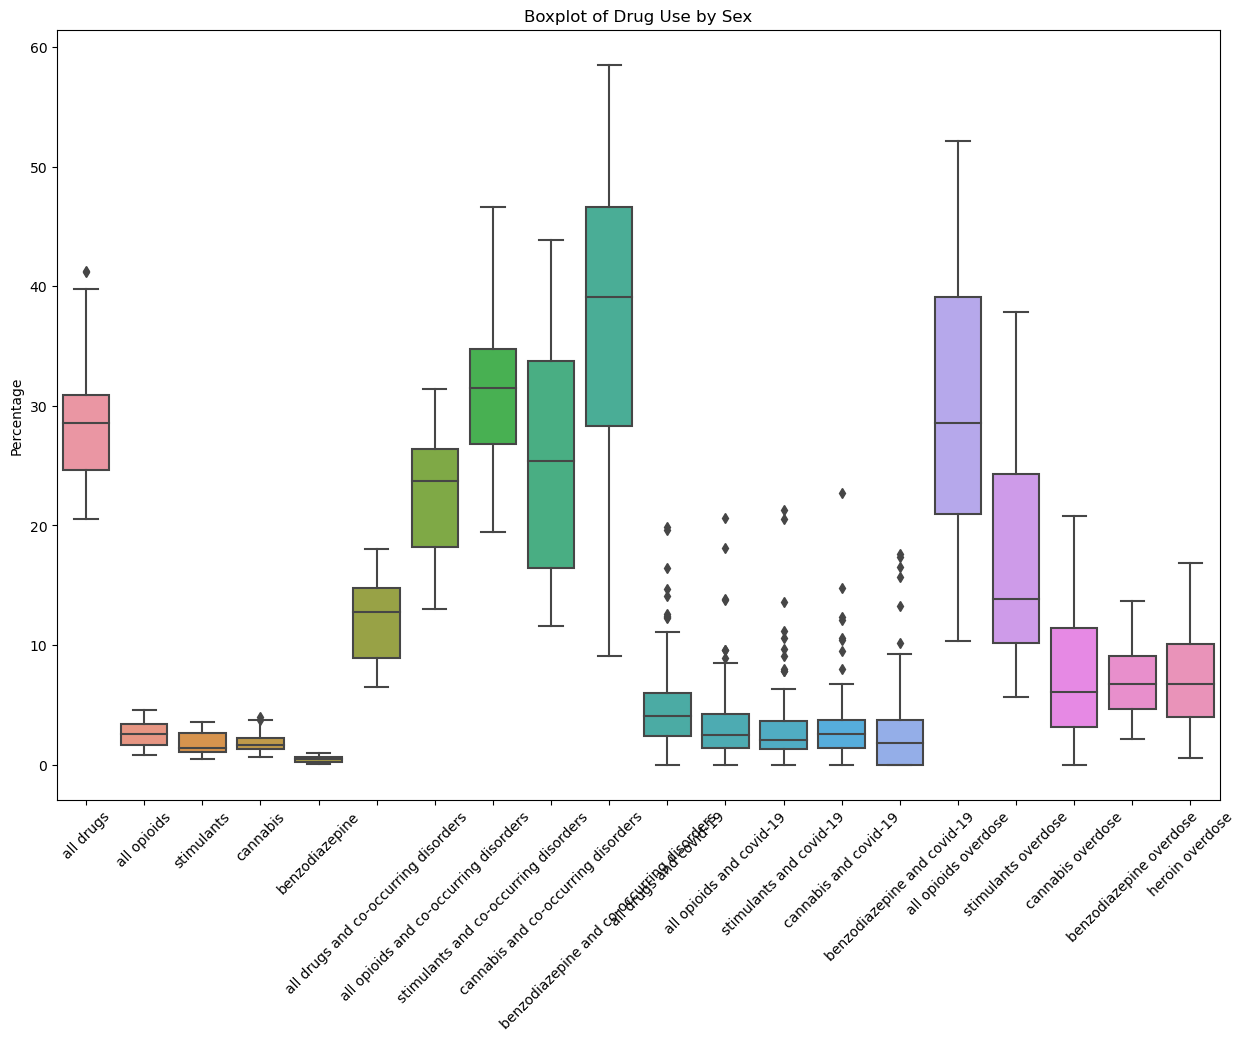

In [23]:
# Display a boxplot for the data
plt.figure(figsize=(15, 10))
sns.boxplot(data=drug_sex_df.drop(columns=['time', 'sex', 'setting']))
plt.title("Boxplot of Drug Use by Sex")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

In [28]:
drug_sex_df.columns

Index(['sex', 'time', 'start_time', 'end_time', 'setting', 'all drugs',
       'all opioids', 'stimulants', 'cannabis', 'benzodiazepine',
       'all drugs and co-occurring disorders',
       'all opioids and co-occurring disorders',
       'stimulants and co-occurring disorders',
       'cannabis and co-occurring disorders',
       'benzodiazepine and co-occurring disorders', 'all drugs and covid-19',
       'all opioids and covid-19', 'stimulants and covid-19',
       'cannabis and covid-19', 'benzodiazepine and covid-19',
       'all opioids overdose', 'stimulants overdose', 'cannabis overdose',
       'benzodiazepine overdose', 'heroin overdose'],
      dtype='object')

all drugs


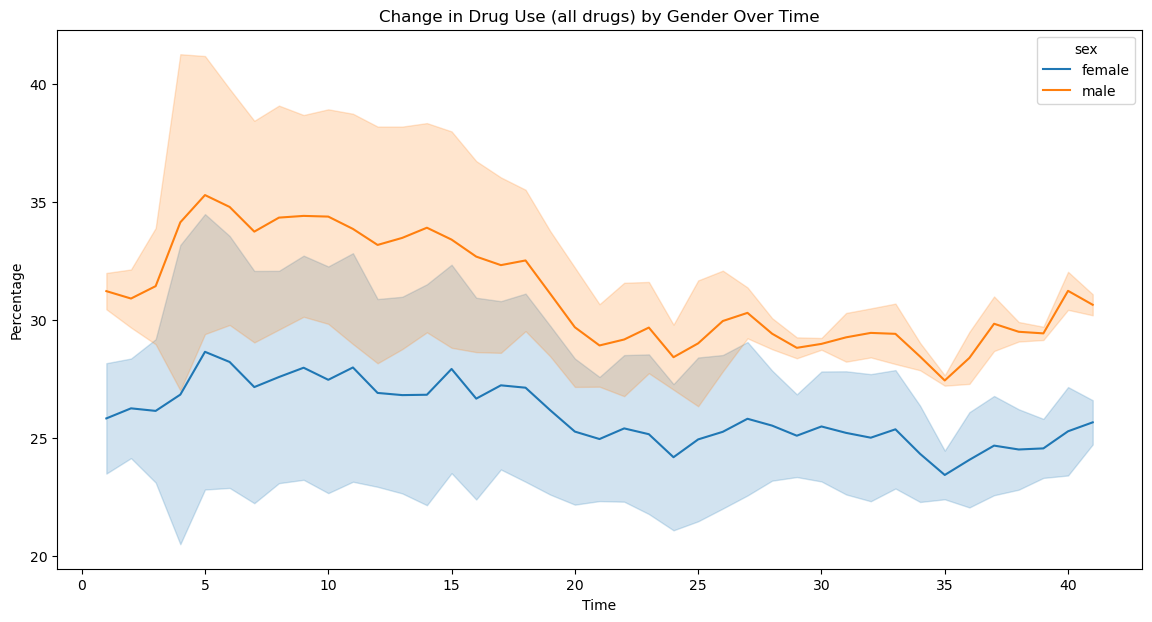

all opioids


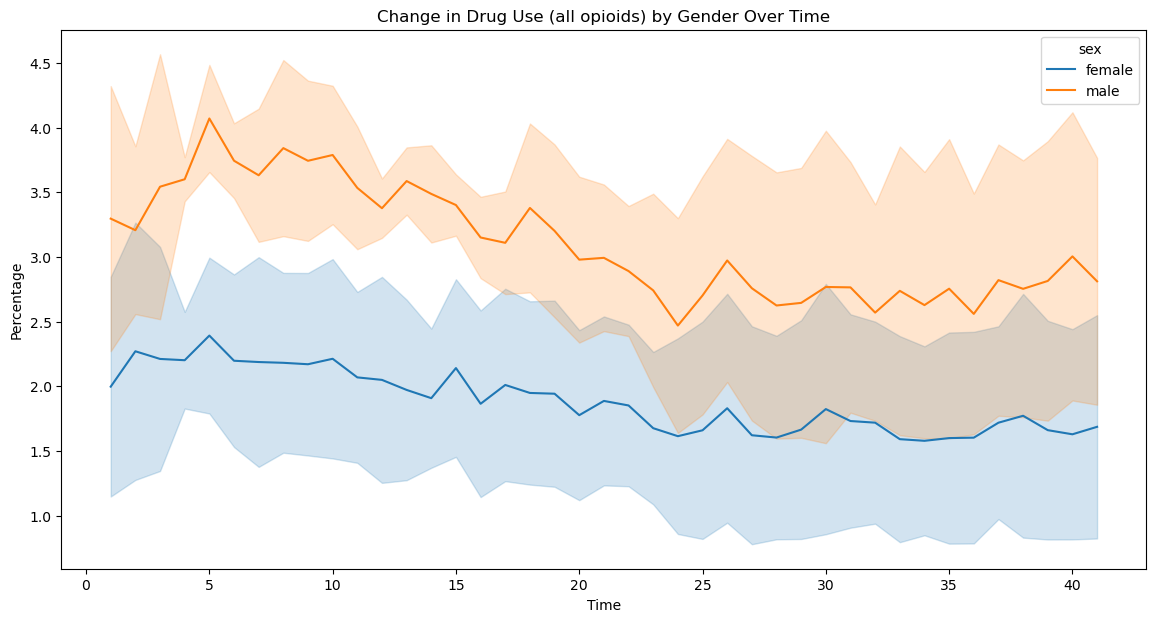

stimulants


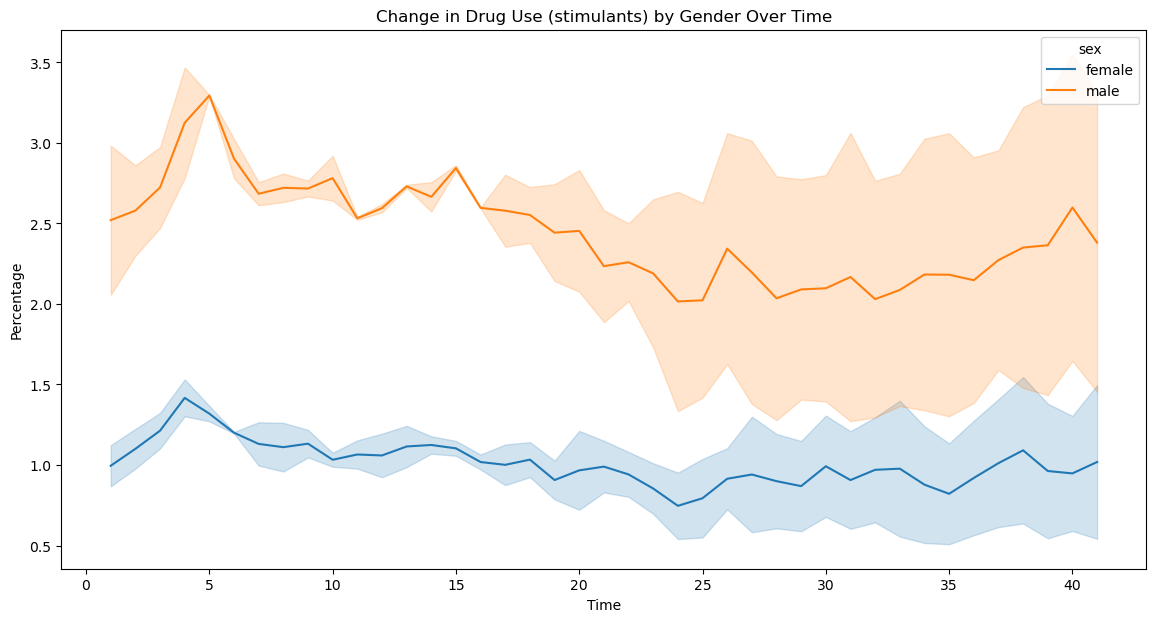

cannabis


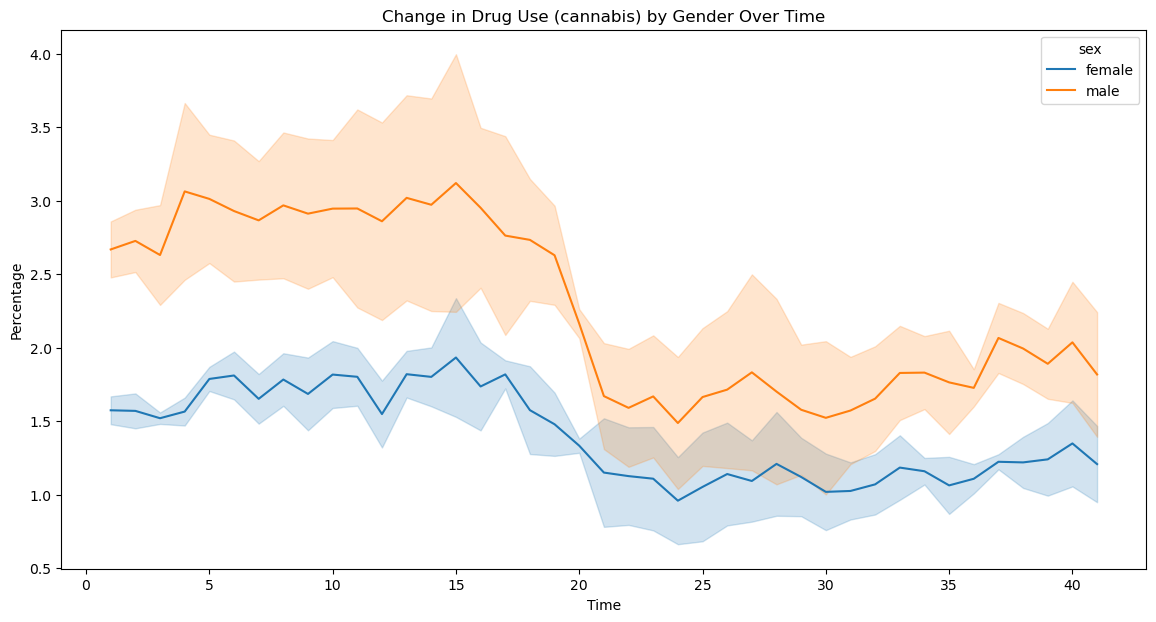

benzodiazepine


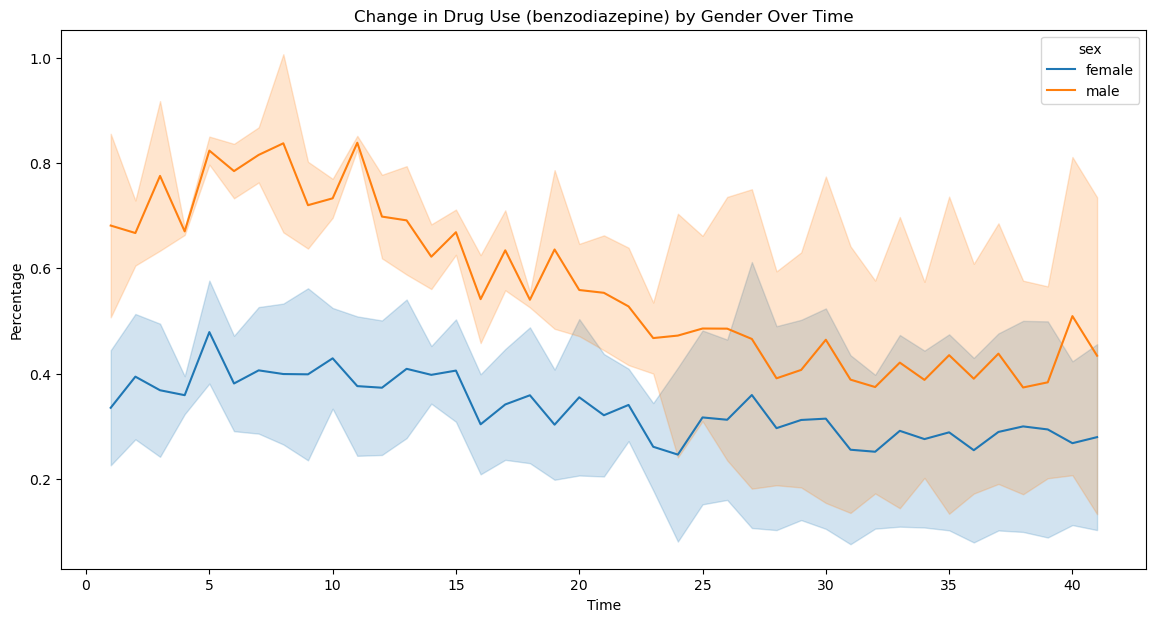

all drugs and co-occurring disorders


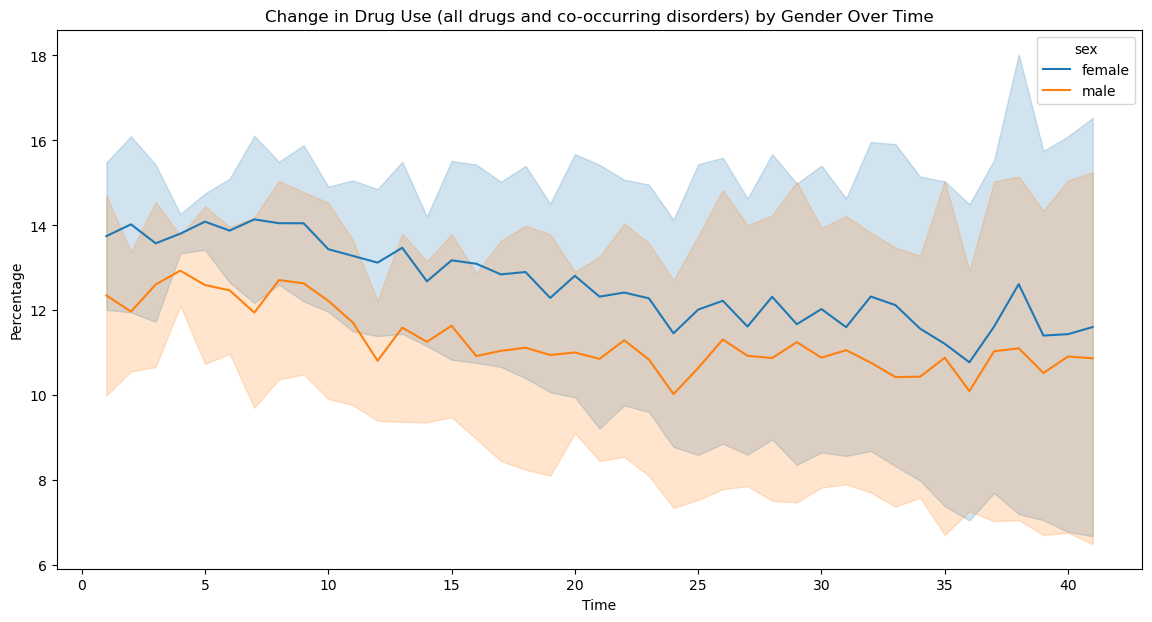

all opioids and co-occurring disorders


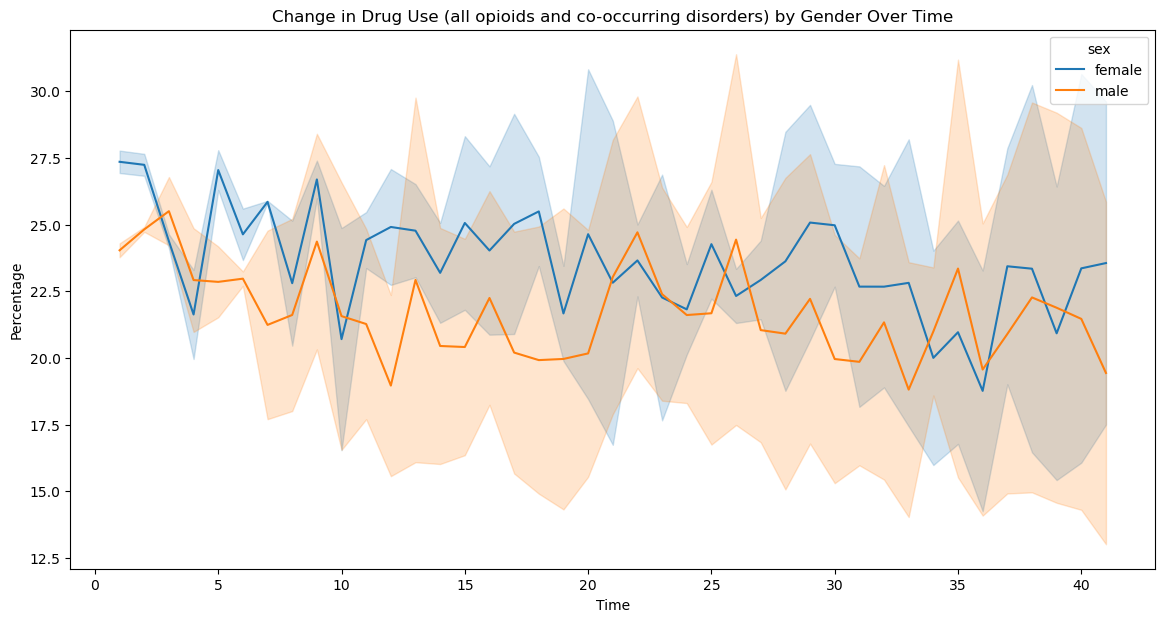

stimulants and co-occurring disorders


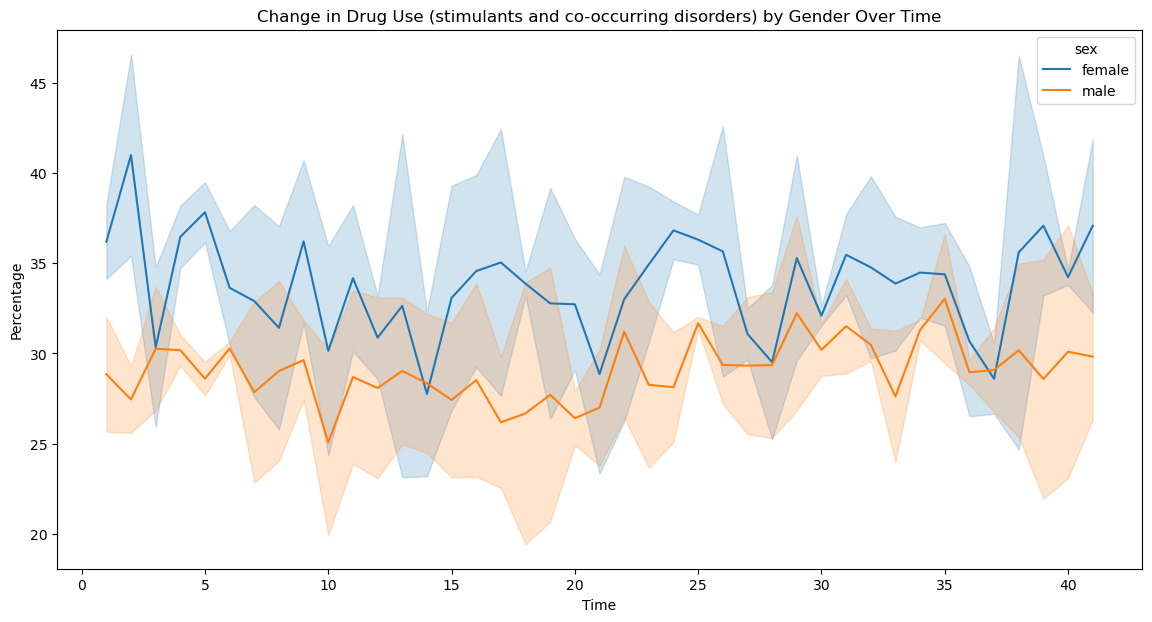

cannabis and co-occurring disorders


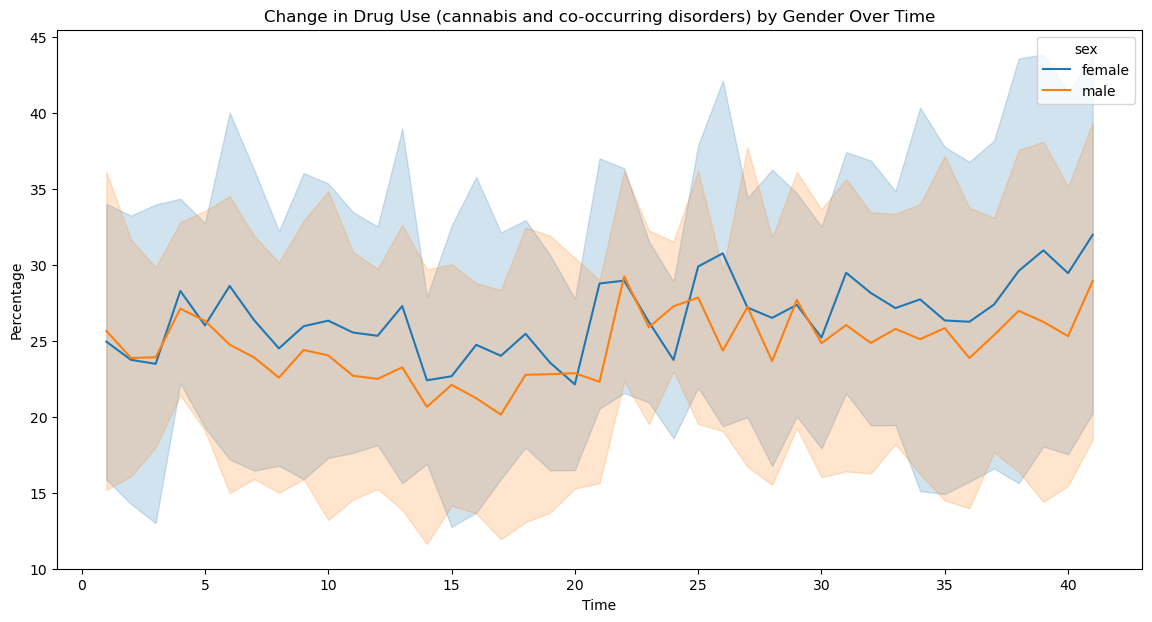

benzodiazepine and co-occurring disorders


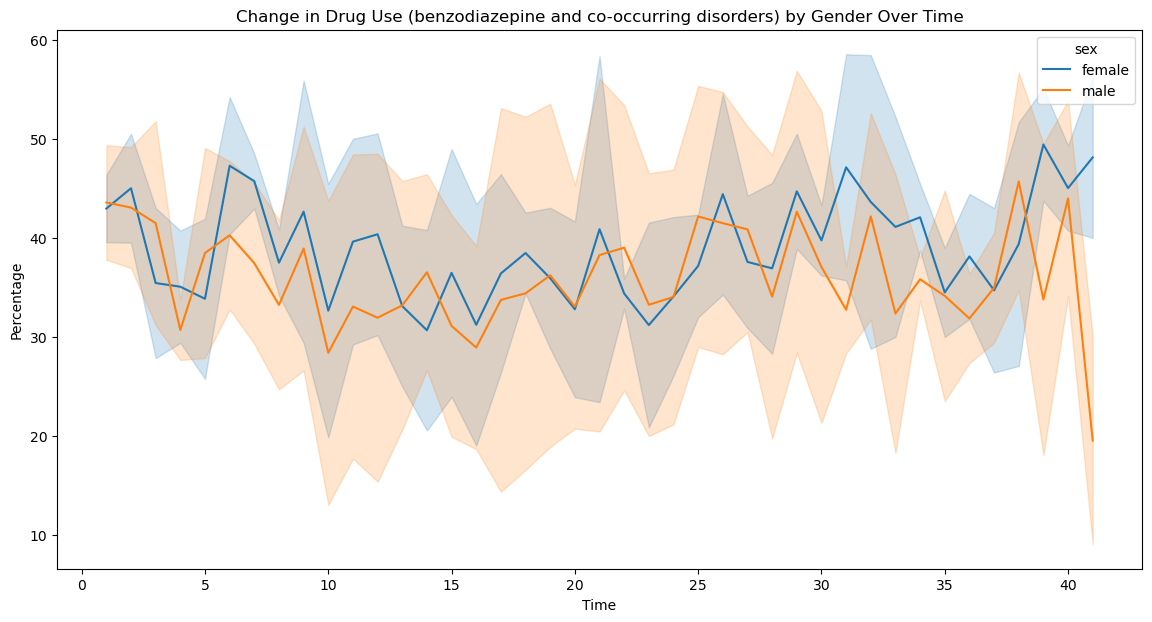

all drugs and covid-19


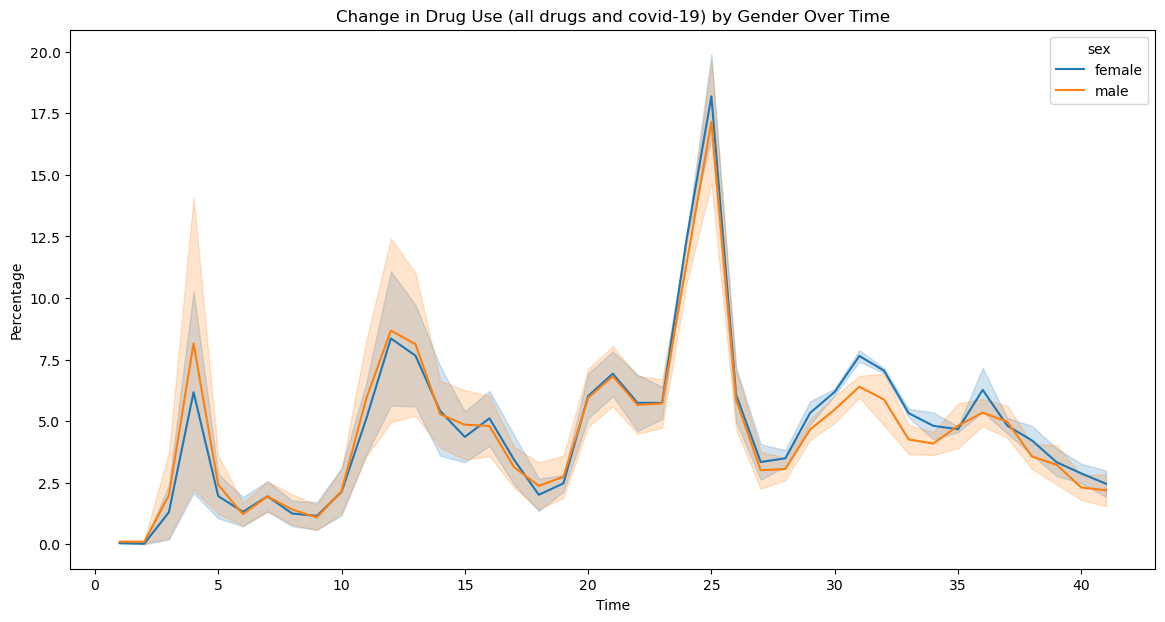

all opioids and covid-19


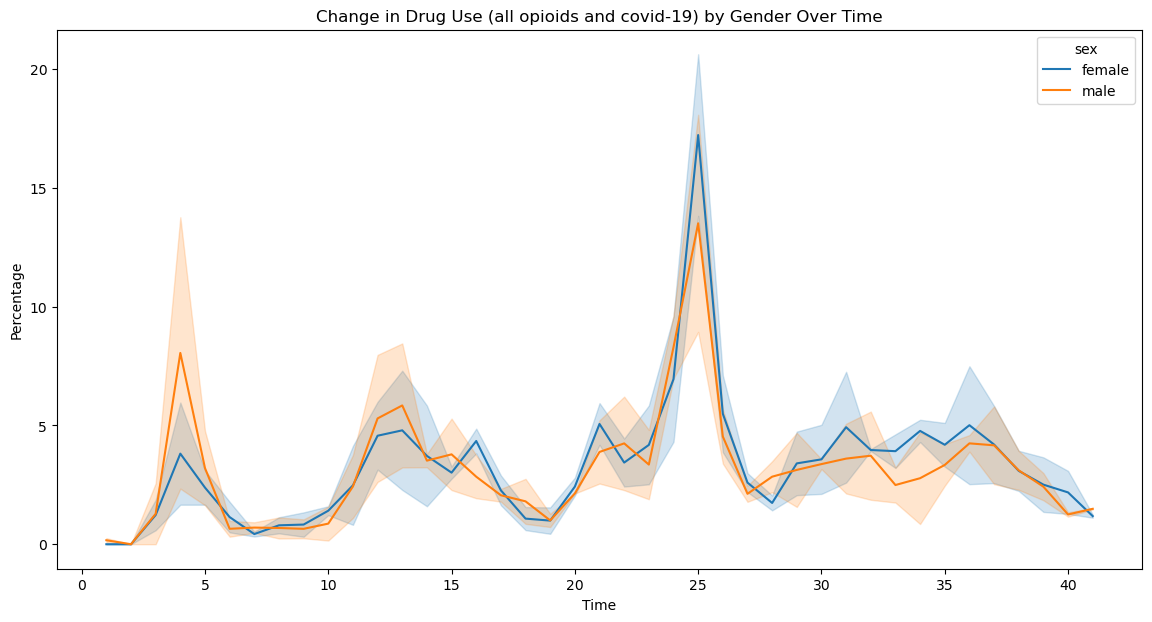

stimulants and covid-19


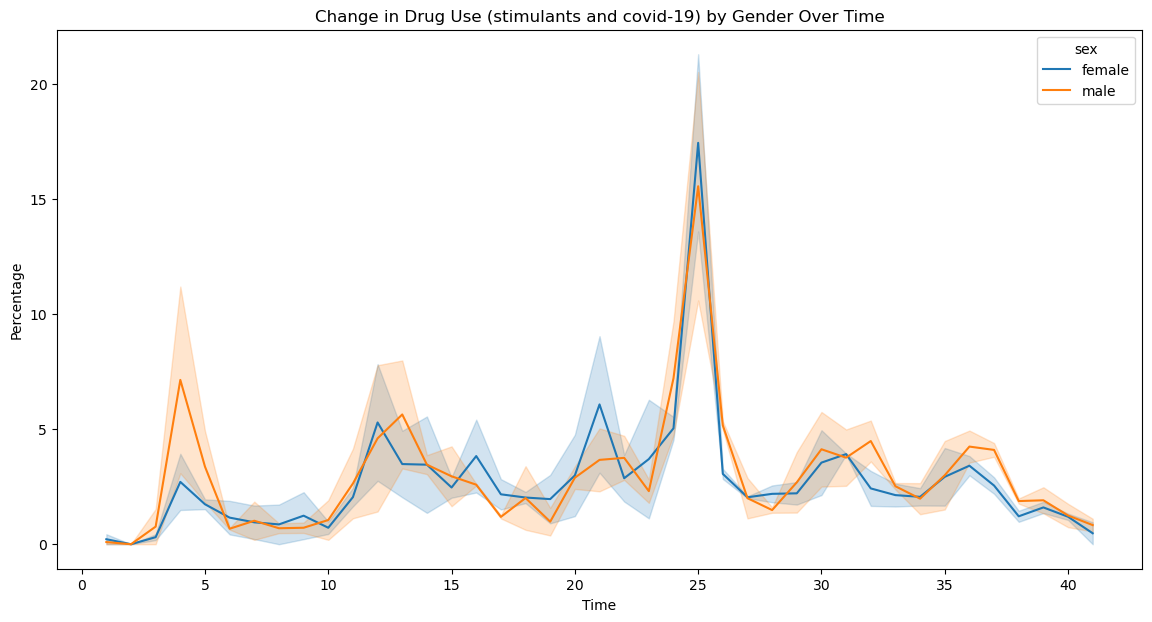

cannabis and covid-19


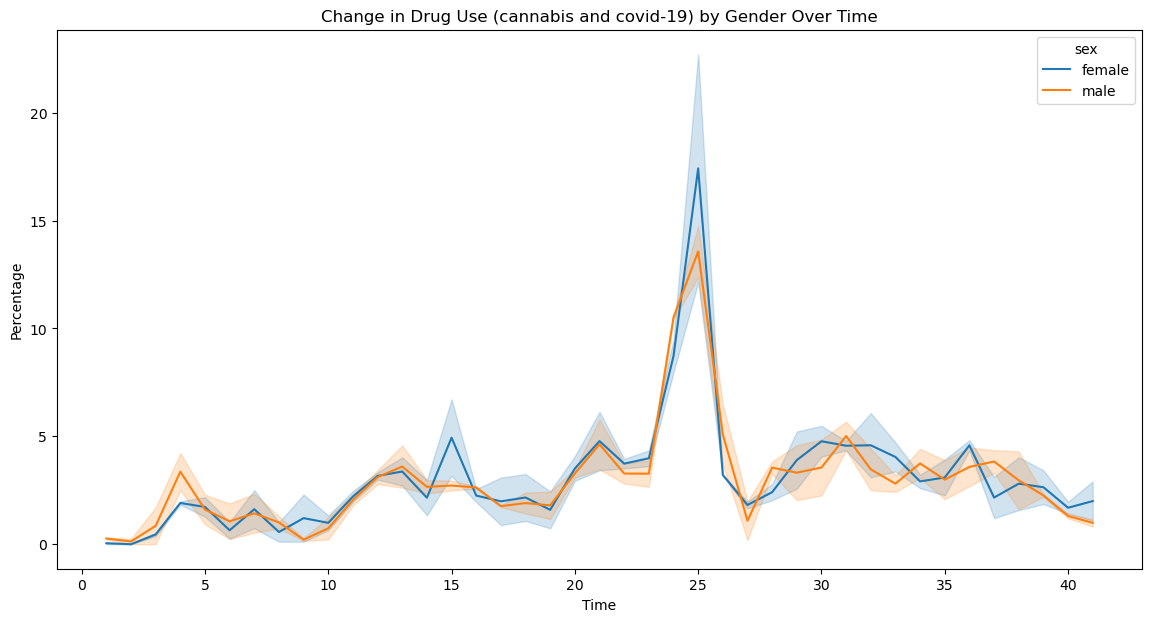

benzodiazepine and covid-19


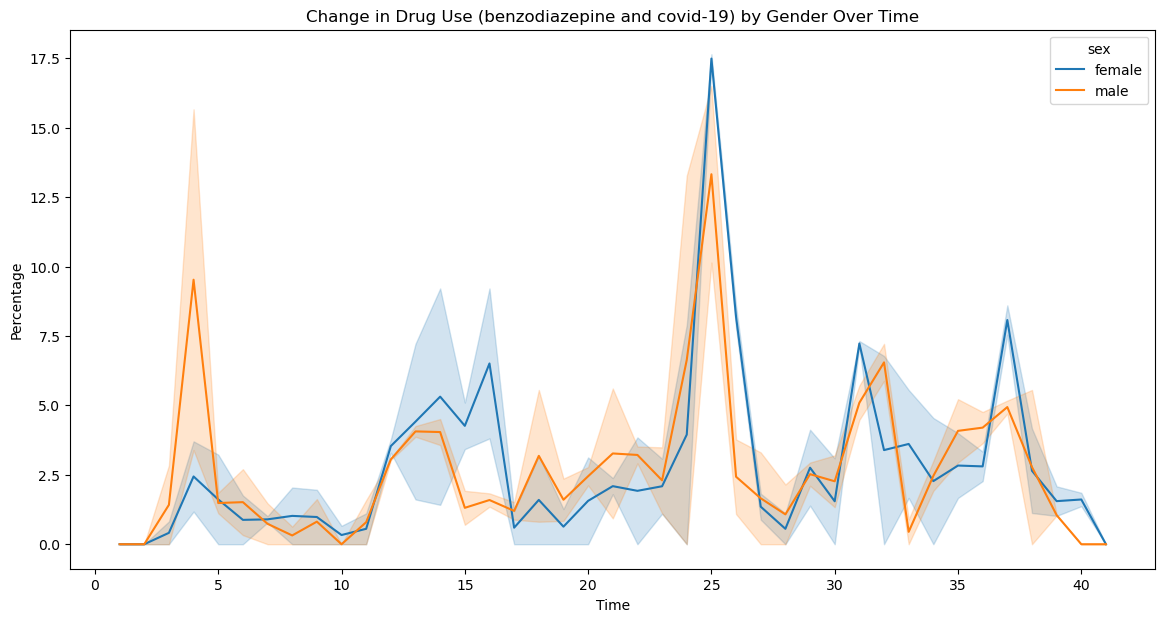

all opioids overdose


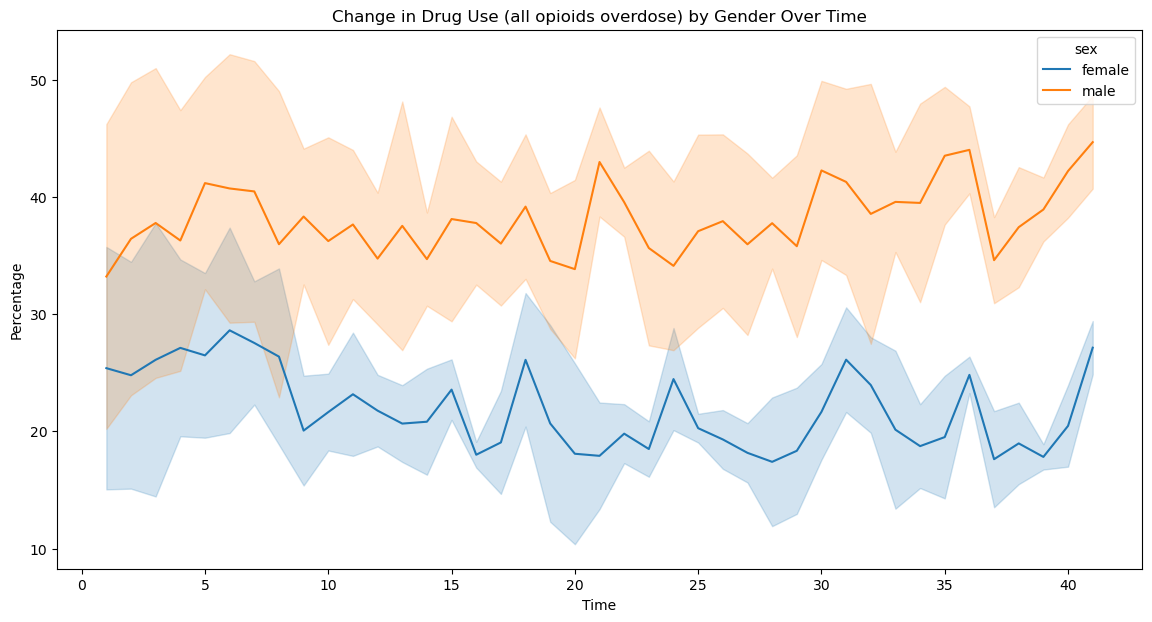

stimulants overdose


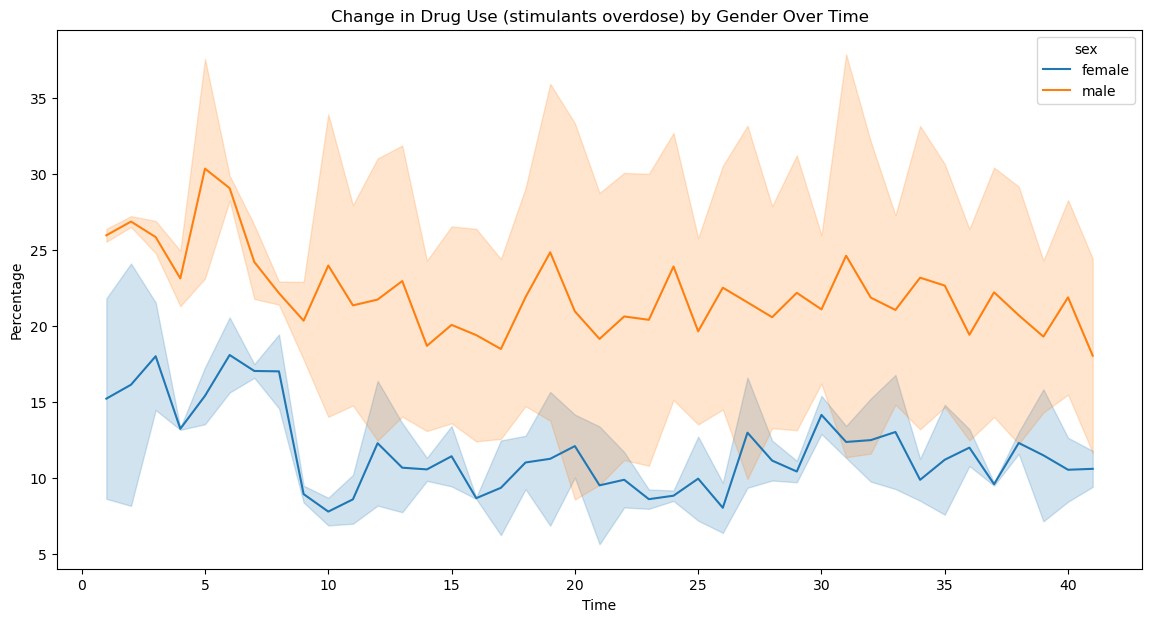

cannabis overdose


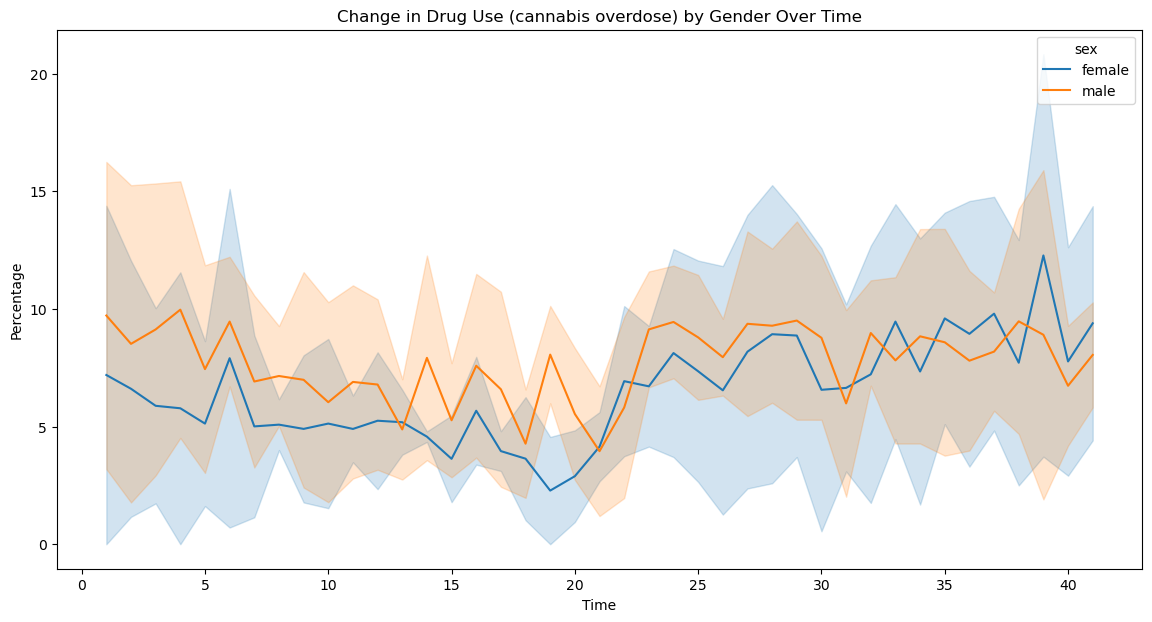

benzodiazepine overdose


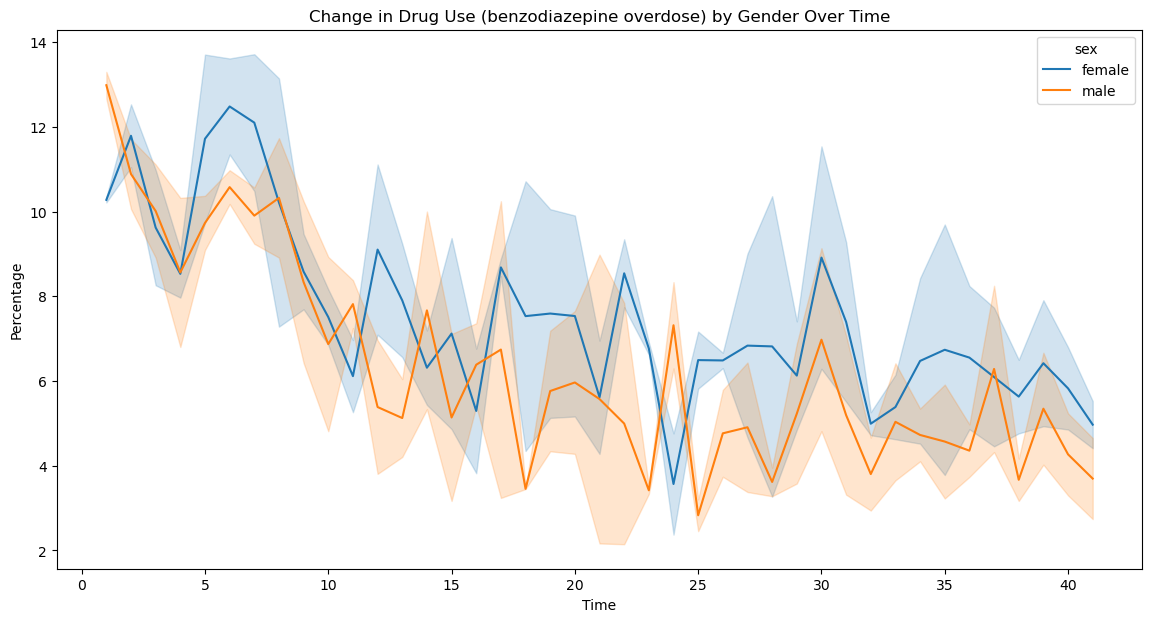

heroin overdose


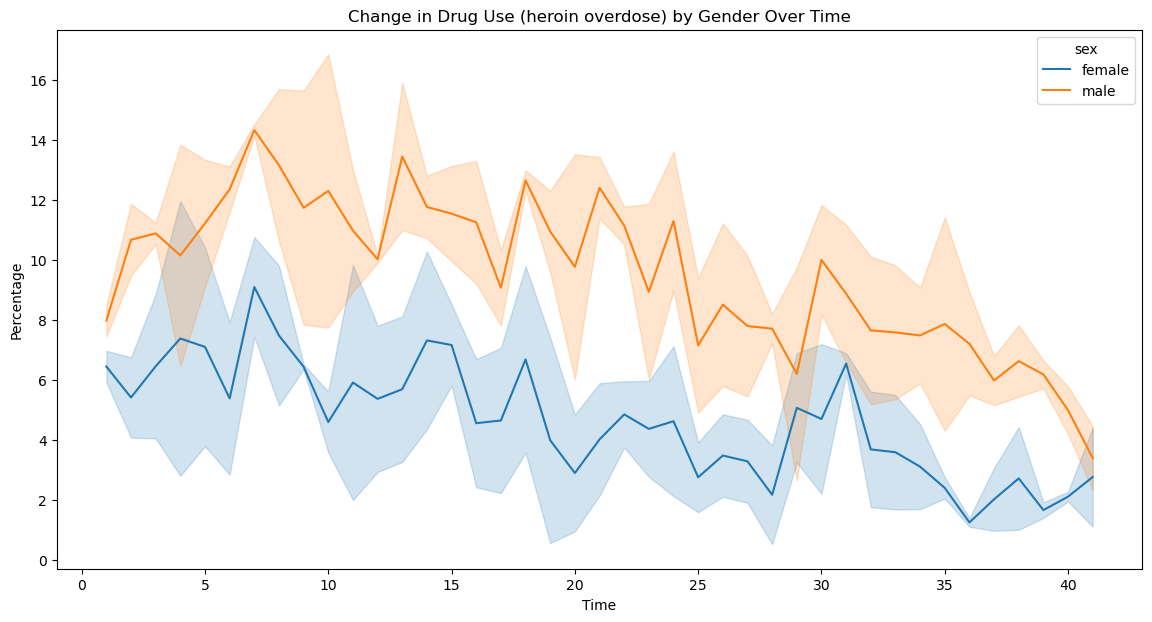

In [103]:
info_columns_to_exclude = ['sex', 'setting', 'time', 'start_time', 'end_time']
for col in drug_sex_df.columns:
    if col not in info_columns_to_exclude:
        print(col)
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=drug_sex_df, x='time', y=col, hue='sex')
        title = f"Change in Drug Use ({col}) by Gender Over Time"
        plt.title(title)
        plt.ylabel('Percentage')
        plt.xlabel('Time')
        plt.show()

In [51]:
def plot_kde(df):
    int_vars = df.select_dtypes(include = ['int','float'])
    fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(15,10))
    axs = axs.flatten()

    for i, var in enumerate (int_vars):
        sns.kdeplot(x=var,data=df,ax=axs[i])

    plt.tight_layout()
    plt.show()

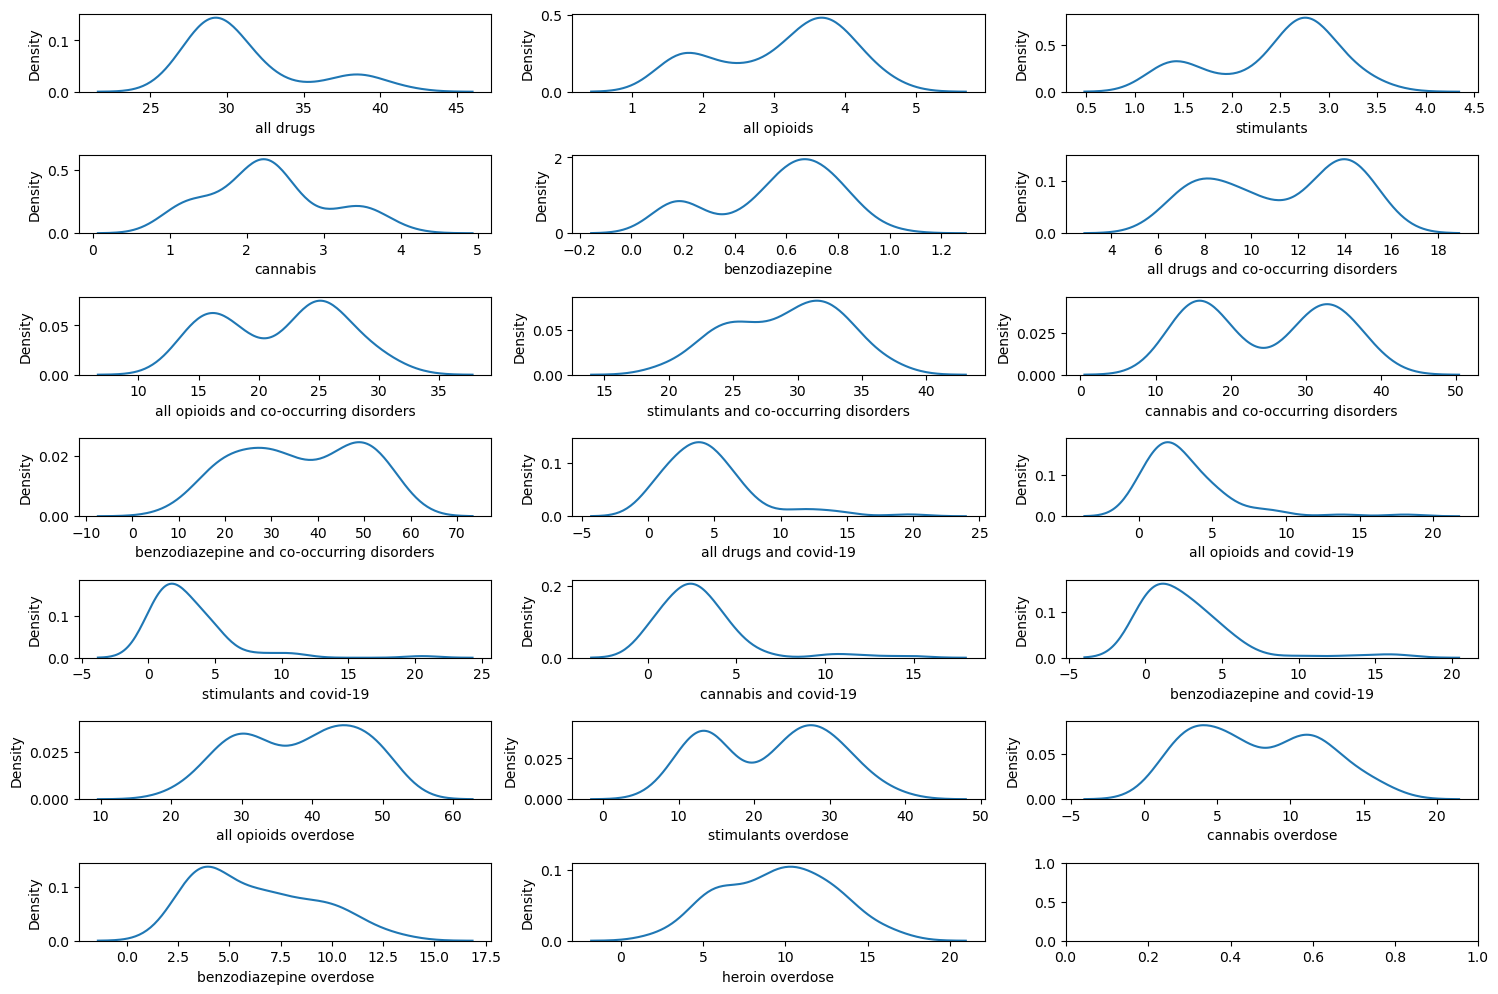

In [52]:
plot_kde(male_drug_sex_df)

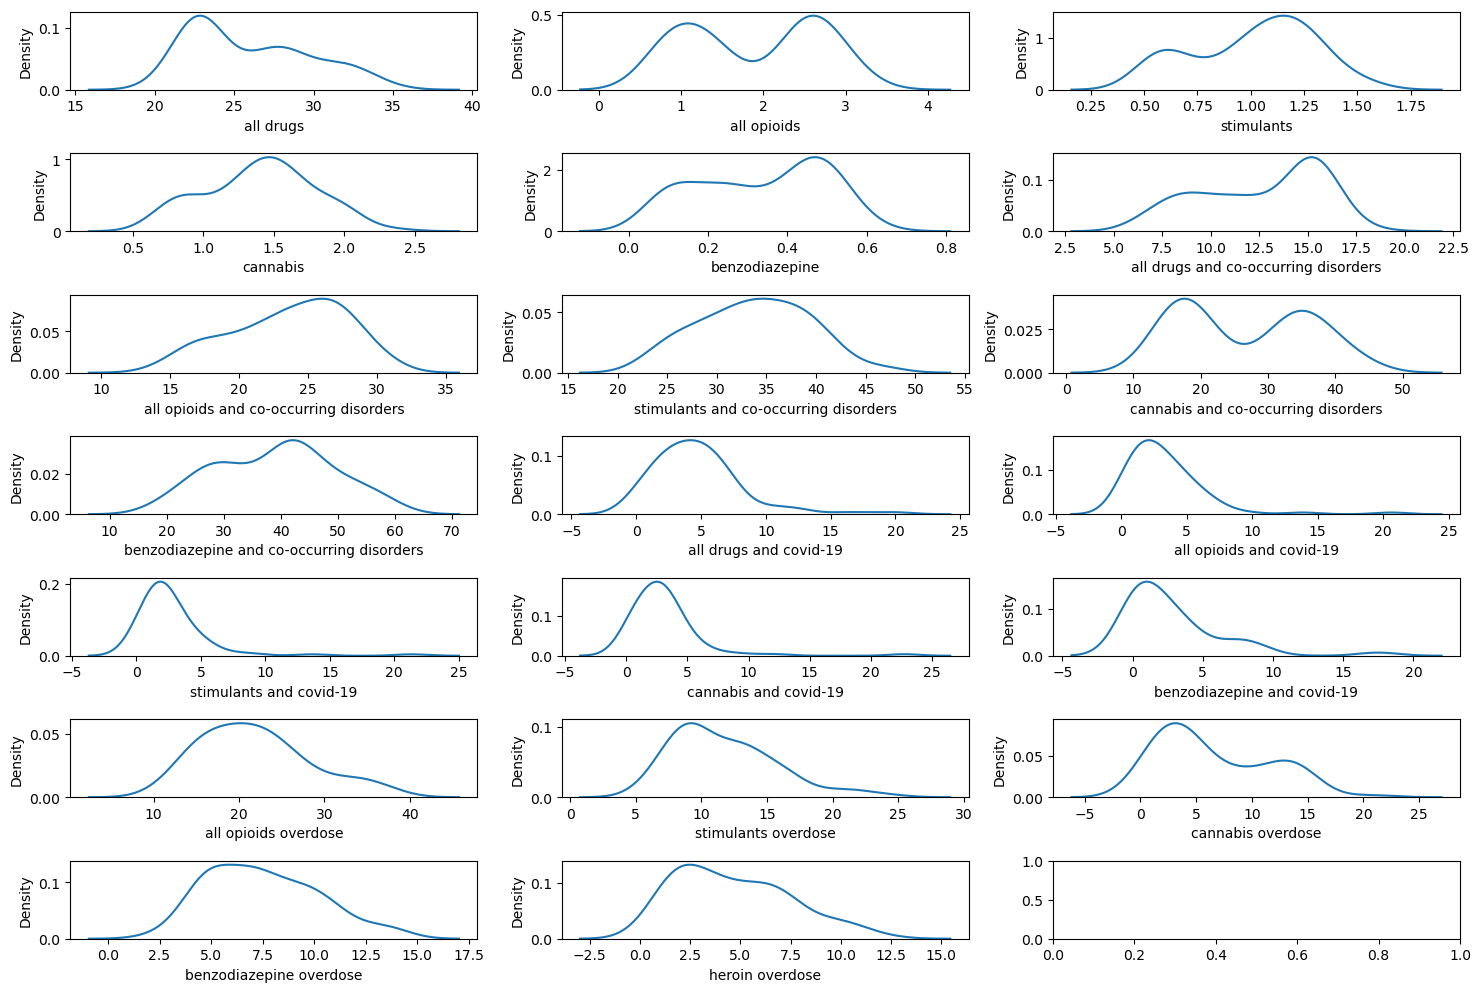

In [53]:
plot_kde(female_drug_sex_df)

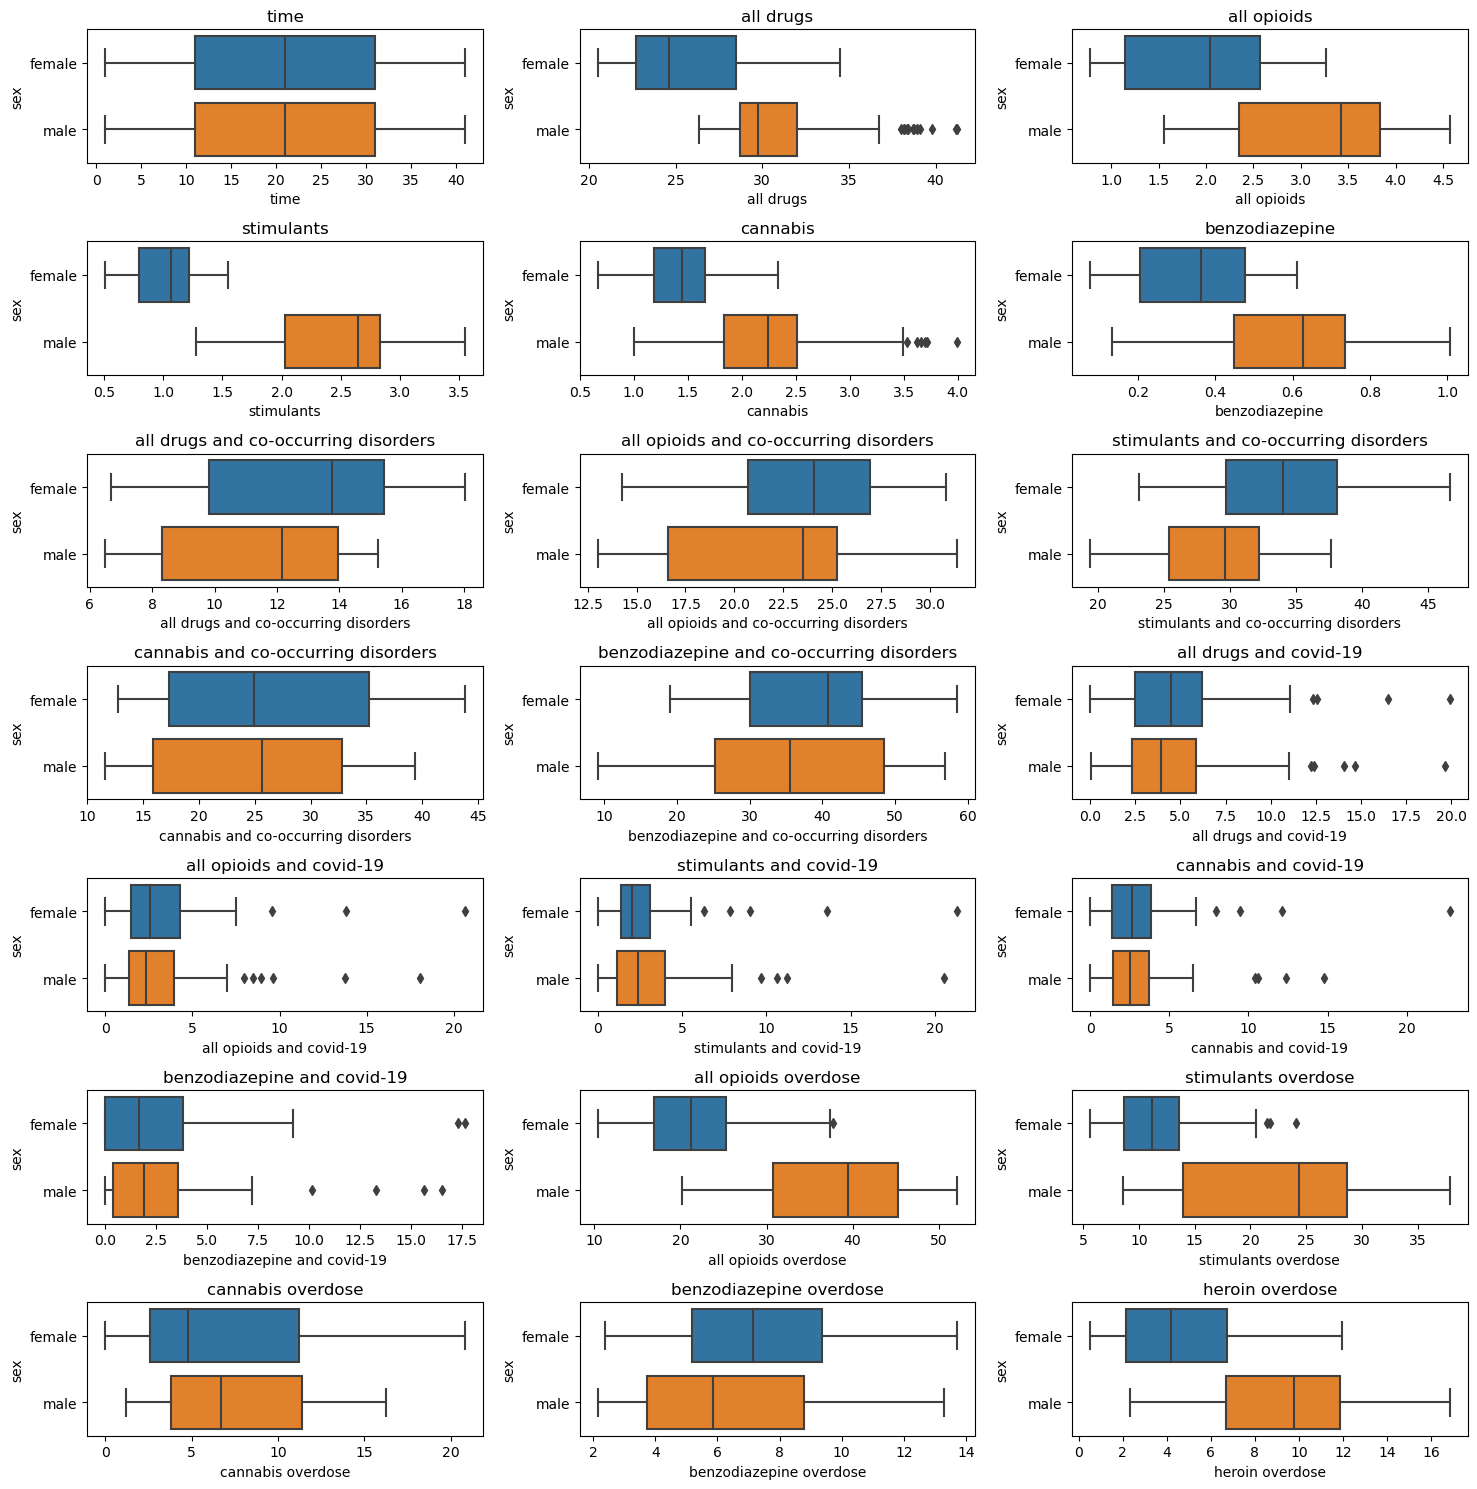

In [96]:
multivariant_analysis(drug_sex_df, 'sex', 'box')

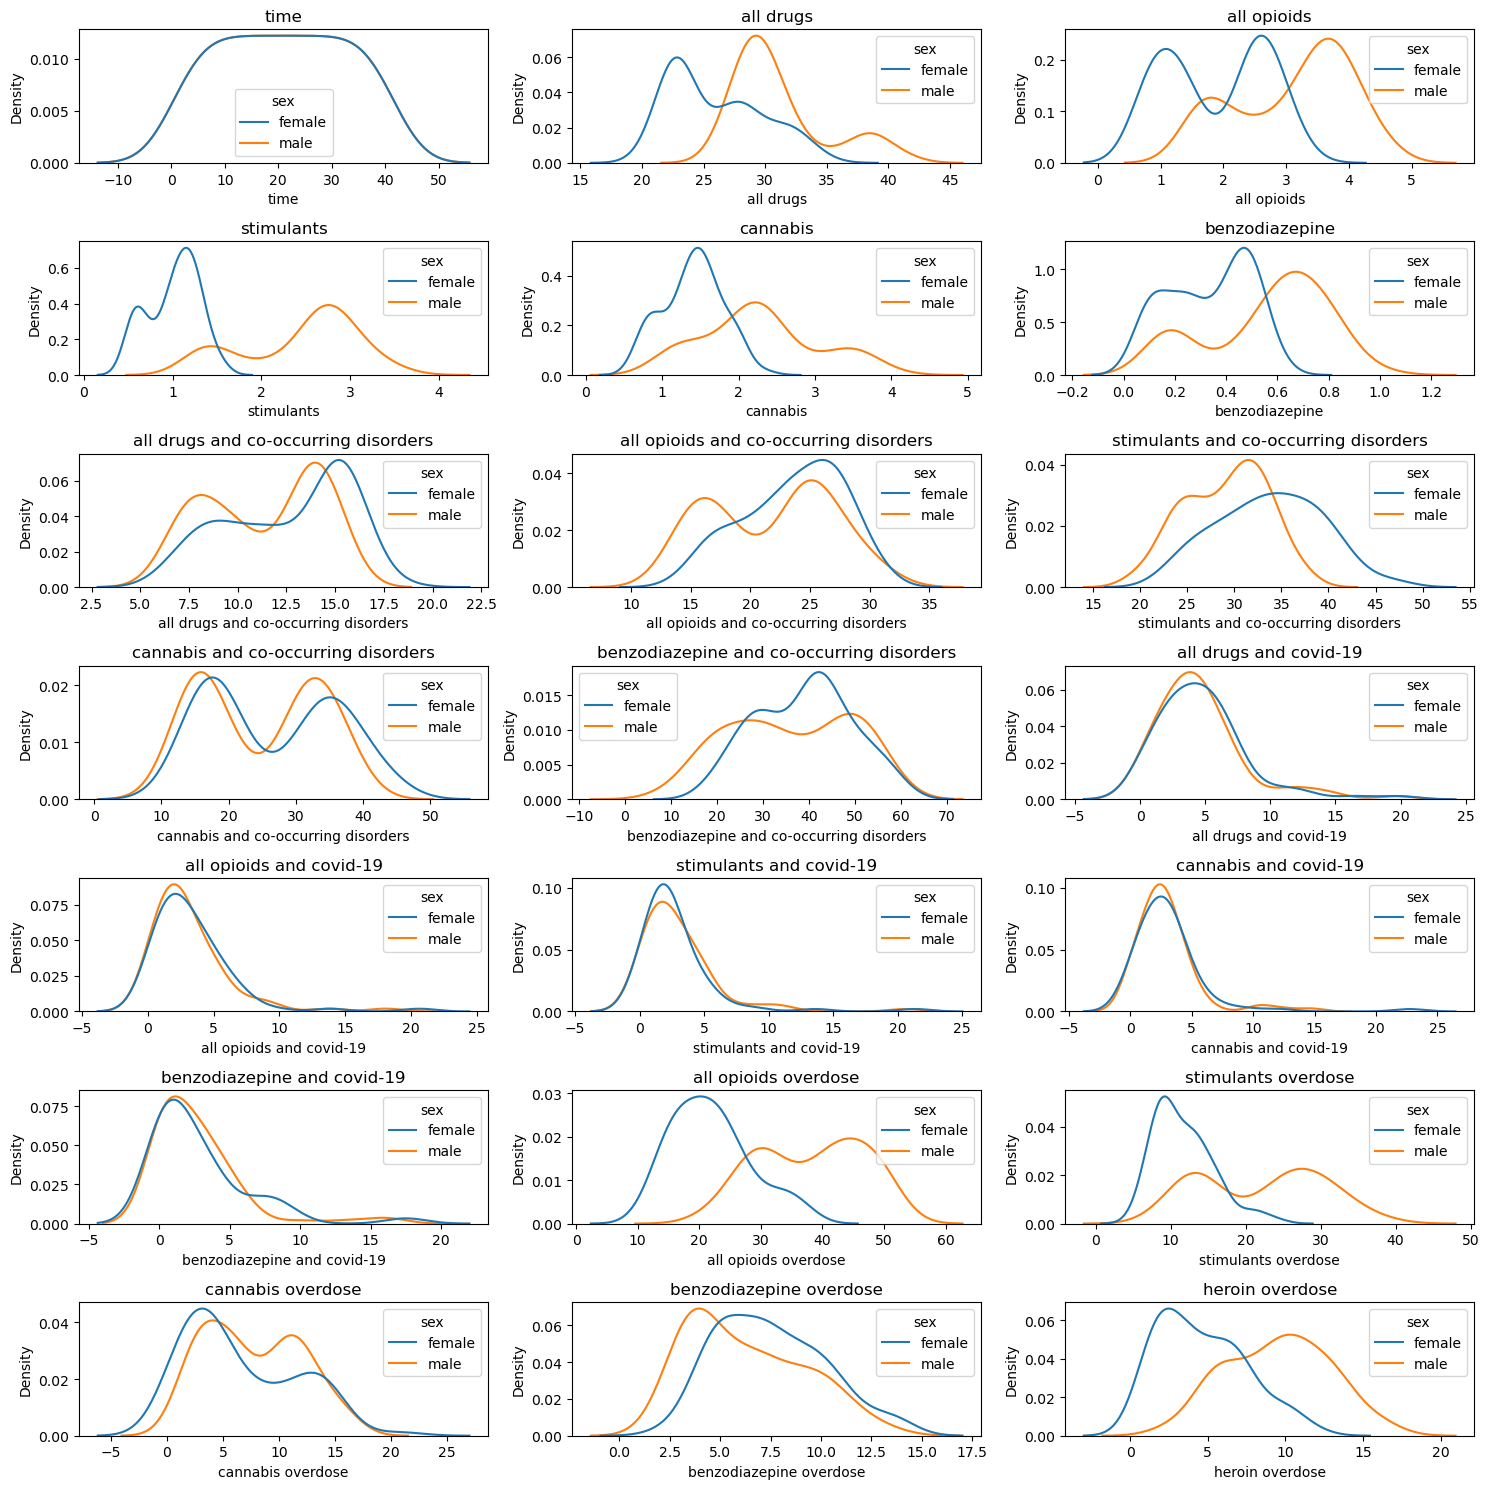

In [97]:
multivariant_analysis(drug_sex_df, 'sex', 'kde')

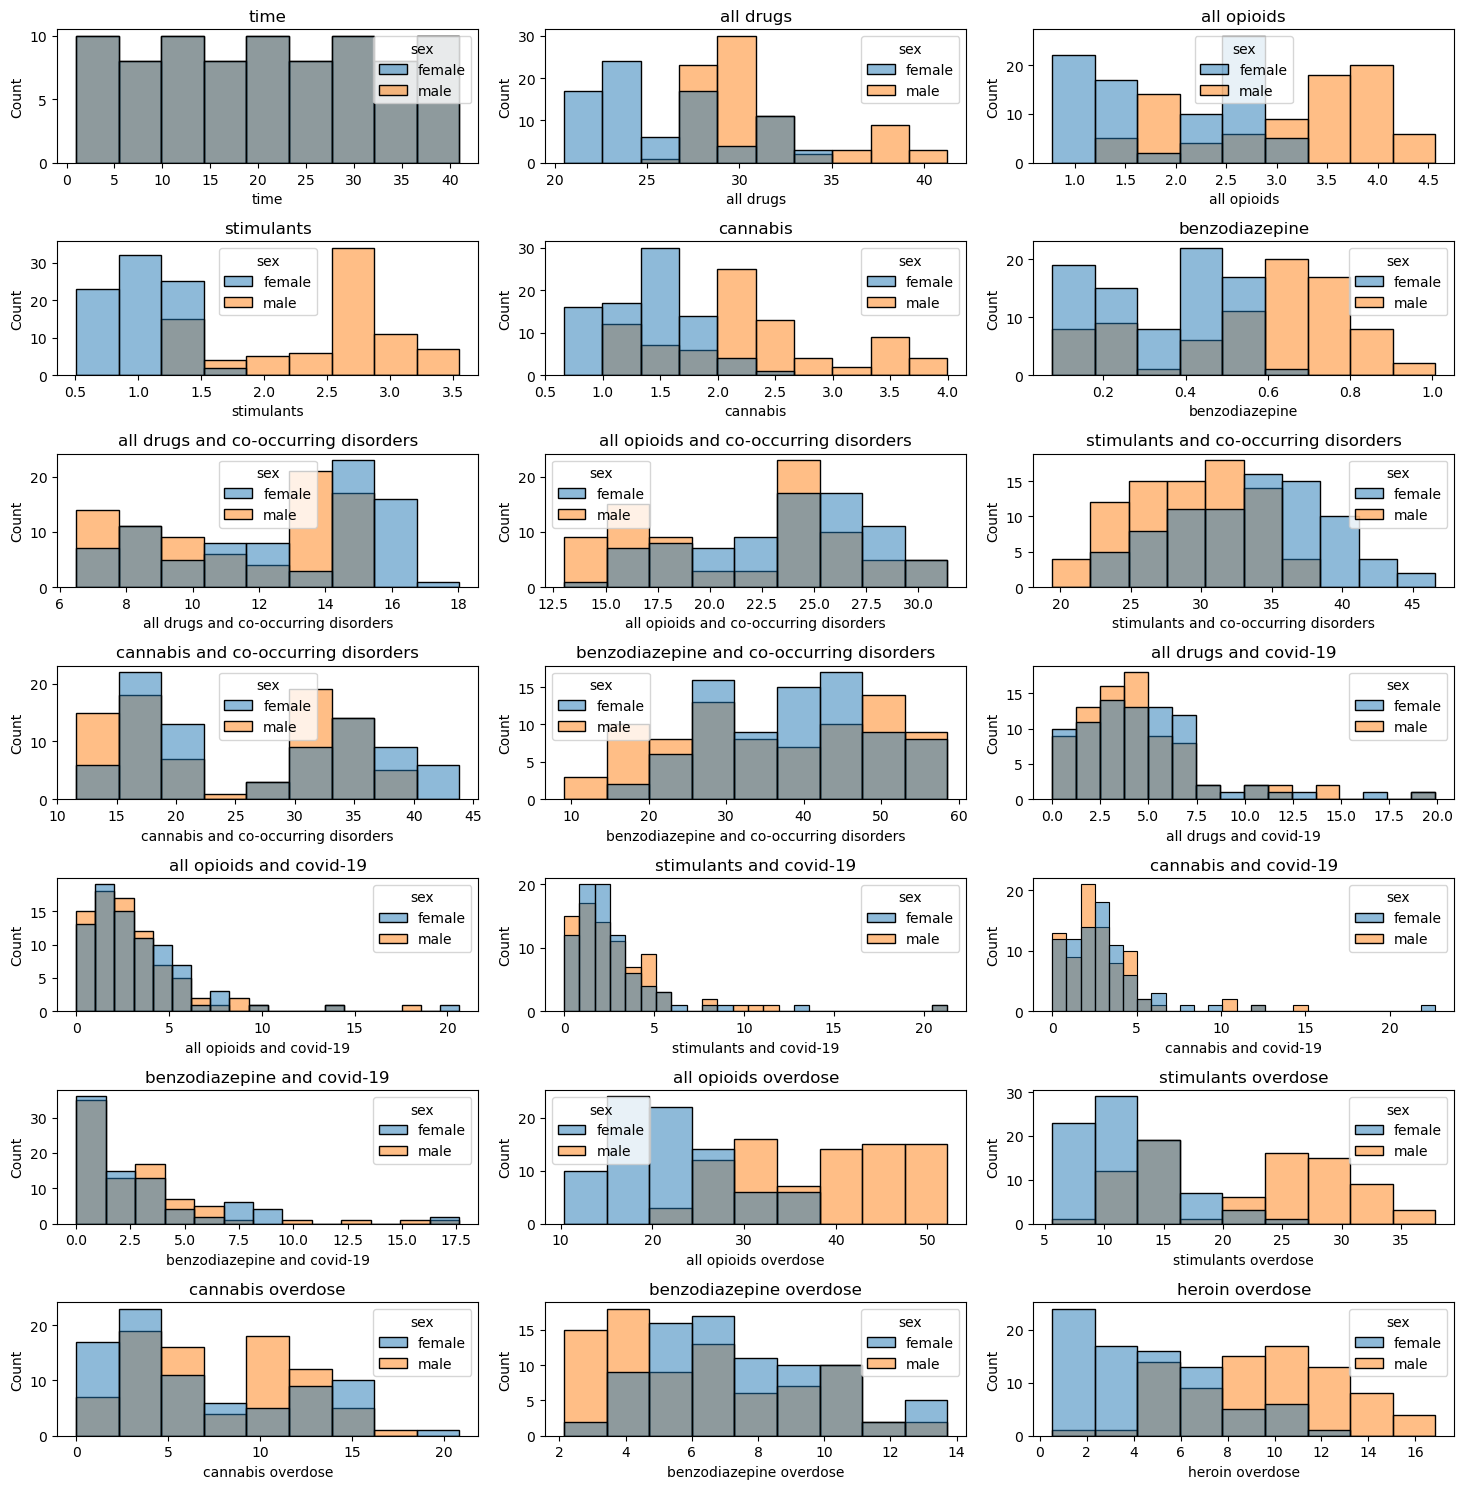

In [98]:
multivariant_analysis(drug_sex_df, 'sex', 'hist')